# Guided Project: Clean and Analyze Employee Exit Surveys

## Introduction

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

### Instructions

1. Import the pandas and NumPy libraries.
2. Read the `dete_survey.csv` CSV file into pandas, and assign it to the variable name `dete_survey`.
3. Read the `tafe_survey.csv` CSV file into pandas, and assign it to the variable name `tafe_survey`.
4. Use the `DataFrame.info()` and `DataFrame.head()` methods to print information about both dataframes, as well as the first few rows. Use other data exploration methods such as the `Series.value_counts()` and `DataFrame.isnull()` methods to explore the data and figure out some next steps.

In [1]:
# import pandas and NumPy
import pandas as pd
import numpy as np

# Read dete_survey and tefe_survey
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
# Use dataframe.info() and dataframe.head() for dete survey
print(dete_survey.info())
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
# Use dataframe.info() and dataframe.head() for tafe_survey
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [4]:
# Use isnull() methods to explore data
missing_dete = dete_survey.isnull().sum()

print(missing_dete)

print(dete_survey['Classification'].value_counts())
print(dete_survey['Business Unit'].value_counts())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
# Use is.null() and value_counts() for tafe_survey
missing_tafe = tafe_survey.isnull().sum()

print(missing_tafe)
print(tafe_survey['CESSATION YEAR'].value_counts())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64
2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATIO

## Identify Missing Values and Drop Unnecessary Columns

From our work in the previous screen, we can first make the following observations:

* The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. Recall that we can use the [`pd.read_csv()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to specify values that should be represented as `NaN`.

### Instructions

1. Read the `dete_survey.csv` CSV file into pandas again, but this time read the `Not Stated` values in as `NaN`.
    * To read `Not Stated` in as `NaN`, set the `na_values` parameter to `Not Stated` in the `pd.read_csv()` function.
    * Assign the result to the variable name `dete_survey`.
2. Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.
    * Use the [`DataFrame.drop()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to drop the following columns from `dete_survey`: `dete_survey.columns[28:49]`. Remember to set the `axis` parameter equal to `1`.
        * Assign the result to `dete_survey_updated`.
    * Use the `DataFrame.drop()` method to drop the following columns from `tafe_survey`: `tafe_survey.columns[17:66]`. Remember to set the `axis` parameter equal to `1`.
        * Assign the result to `tafe_survey_updated`.

In [6]:
# Read dete_survey.csv but read Not Stated values as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [7]:
# Drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print(dete_survey_updated)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(tafe_survey_updated)

      ID                        SeparationType Cease Date  DETE Start Date  \
0      1                 Ill Health Retirement    08/2012           1984.0   
1      2      Voluntary Early Retirement (VER)    08/2012              NaN   
2      3      Voluntary Early Retirement (VER)    05/2012           2011.0   
3      4             Resignation-Other reasons    05/2012           2005.0   
4      5                        Age Retirement    05/2012           1970.0   
..   ...                                   ...        ...              ...   
817  819                        Age Retirement    02/2014           1977.0   
818  820                        Age Retirement    01/2014           1980.0   
819  821  Resignation-Move overseas/interstate    01/2014           2009.0   
820  822                 Ill Health Retirement    12/2013           2001.0   
821  823  Resignation-Move overseas/interstate    12/2013              NaN   

     Role Start Date                                      Posit

## Clean Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

Because we eventually want to combine them, we'll have to standardize the column names. Recall that we can use the DataFrame.columns attribute along with vectorized string methods to update all of the columns at once. Here's an example from the last lesson:

`
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
`

### Instructions

1. Rename the remaining columns in the `dete_survey_updated` dataframe.
    * Use the following criteria to update the column names:
        * Make all the capitalization lowercase.
        * Remove any trailing whitespace from the end of the strings.
        * Replace spaces with underscores ('_').
    * As an example, `Cease Date` should be updated to `cease_date`.
    * Remember you can use the `DataFrame.columns` attribute to print an array of the existing column names.
2. Use the [`DataFrame.rename()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) to update the columns below in `tafe_survey_updated`. Don't worry about the rest of the column names right now - we'll handle them later.
    * 'Record ID': 'id'
    * 'CESSATION YEAR': 'cease_date'
    * 'Reason for ceasing employment': 'separationtype'
    * 'Gender. What is your Gender?': 'gender'
    * 'CurrentAge. Current Age': 'age'
    * 'Employment Type. Employment Type': 'employment_status'
    * 'Classification. Classification': 'position'
    * 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
    * 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
3. Use the [`DataFrame.head()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) to look at the current state of the `dete_survey_updated` and `tafe_survey_updated` dataframes and make sure your changes look good.

In [8]:
# Rename the dete_survey_updated columns
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.lower().str.strip()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [9]:
# Rename tafe_survey_updated columns
tafe_survey_updated = tafe_survey_updated.rename(columns = {
    'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

In [10]:
# Use dataframe.head() to look at both dataframes
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

## Filter the Data

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

If you're interested in a challenge, try to complete the project using all of the separation types instead - you'll find more issues to work through in the data cleaning process.

Note that `dete_survey_updated` dataframe contains multiple separation types with the string `'Resignation'`:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In this step, note that you may see what is known as a [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/). This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe.

### Instructions

1. Use the `Series.value_counts()` method to review the unique values in the `separationtype` column in both `dete_survey_updated` and `tafe_survey_updated`.
2. In each of dataframes, select only the data for survey respondents who have a `Resignation` separation type.
    * Remember that the `dete_survey_updated` dataframe contains three `Resignation` separation types. We want to select all of them.
    * Use the `DataFrame.copy()` method on the result to avoid the SettingWithCopy Warning.
    * Assign the result for `dete_survey_updated` to `dete_resignations`.
    * Assign the result for `tafe_survey_updated` to `tafe_resignations`.

In [11]:
# Use series.value_counts to review unqiue separationtype column in both dataframes
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
# Creating new dataframes with resignation separation types
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
print(dete_resignations['separationtype'].value_counts())
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
Resignation    340
Name: separationtype, dtype: int64


## Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way.

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data. 

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well.
* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

### Instructions

1. Check the years in each dataframe for logical inconsistencies.
    * First, clean the `cease_date` column in `dete_resignations`.
        * Use the `Series.value_counts()` method to view the unique values in the `cease_date` column.
        * Use vectorized string methods to extract the year. As a reminder, [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) is the full list.
        * Use the [`Series.astype()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method to convert the type to a float.
    * Use the `Series.value_counts()` to check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` and the `cease_date` column in `tafe_resignations`.
        * Because `Series.value_counts()` returns a series, we can use [`Series.sort_index()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) with `ascending=` `True` or `False` to view the highest and lowest values with their counts.
    * You can also plot the values of any numeric columns with a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) to identify any values that look wrong.

In [13]:
# Find unique values in cease_date
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64


In [14]:
# Use vectorized method to extract the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
print(dete_resignations['cease_date'])

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64


In [15]:
# Check values in cease_date 
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False))
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=True))

print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


In [16]:
# Check values for dete_start_date
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True))

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
20

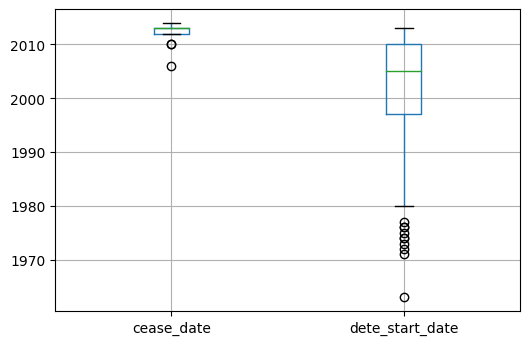

In [17]:
# Create boxplot
import matplotlib.pyplot as plt
%matplotlib inline

dete_resignations.boxplot(column = ['cease_date', 'dete_start_date'])
plt.show()

## Create a New Column

From the work we did, we can verify:

* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

Do we have data that can be used to calculate the length of time the employee spent in their workplace?

### Instructions

1. Create an `institute_service` column in `dete_resignations`
    * Create a new column named `institute_service` in `dete_resignations`.
        * Subtract the `dete_start_date` from the `cease_date`. Assign the result to a new column named `institute_service`.

In [18]:
# Create new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].head())

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64


In [19]:
# Match tafe_resignation column
def new_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val < 1:
        return 'Less than 1 year'
    elif val <= 2:
        return '1-2'
    elif val <= 4:
        return '3-4'
    elif val <= 6:
        return '5-6'
    elif val <= 10:
        return '7-10'
    elif val <= 20:
        return '11-20'
    else:
        return 'More than 20 years'

In [20]:
# Apply function
dete_resignations['institute_service'] = dete_resignations['institute_service'].apply(new_vals)

# Check for success
print(dete_resignations['institute_service'].value_counts(dropna=False))

11-20                 57
More than 20 years    43
7-10                  41
5-6                   40
NaN                   38
3-4                   36
1-2                   36
Less than 1 year      20
Name: institute_service, dtype: int64


## Identify Dissatisfied Employees

From the work we did, we created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied. 

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

1. tafe_survey_updated:
    * `Contributing Factors. Dissatisfaction`
    * `Contributing Factors. Job Dissatisfaction`
2. dete_survey_updated:
    * `job_dissatisfaction`
    * `dissatisfaction_with_the_department`
    * `physical_work_environment`
    * `lack_of_recognition`
    * `lack_of_job_security`
    * `work_location`
    * `employment_conditions`
    * `work_life_balance`
    * `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

To create the new column, we'll do the following:

1. Convert the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe to `True`, `False`, or `NaN` values. 
2. If any of the columns listed above contain a `True` value, we'll add a `True` value to a new column named `dissatisfied`. To accomplish this, we'll write a function that do the following:
    * Return `True` if *any* element in the selected columns above is `True`
    * Return `False` if *none* of the elements in the selected columns above is `True`
    * Return `NaN` if the value is `NaN`
    
After our changes, the new `dissatisfied` column will contain just the following values:

* `True`: indicates a person resigned because they were dissatisfied with the job
* `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
* `NaN`: indicates the value is missing

### Instructions

1. Use the `Series.value_counts()` method to view the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe.
2. Update the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe so that each contains only `True`, `False`, or `NaN` values.
    * Write a function named `update_vals` that makes the following changes:
        * If the value is `NaN`, return `np.nan`. You can use the following criteria to check that a value is `NaN`: `pd.isnull(val)`.
        * If the value is `'-'`, return `False`.
        * For any other value, return `True`.
    * Use the [`DataFrame.applymap()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) to apply the function above to the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe.
        * Remember that we need to pass the `update_vals` function into the `df.applymap()` method *without* parentheses.
3. Use the `df.copy()` method to create a copy of the results and avoid the SettingWithCopy Warning. Assign the results to `dete_resignations_up` and `tafe_resignations_up`.

In [21]:
# Use series.value_counts()
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [22]:
# Create a function
def update_vals(val):
    if val == pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True

In [23]:
# Use dataframe.applymap() method and df.copy()
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[
    ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations_up[
    ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [24]:
# Create new column
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[
    ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

print(tafe_resignations_up['dissatisfied'].value_counts())

False    241
True      99
Name: dissatisfied, dtype: int64

In [25]:
# Apply function to dete_resignations
dete_factors = ['job_dissatisfaction',
                'dissatisfaction_with_the_department',
                'physical_work_environment',
                'lack_of_recognition',
                'lack_of_job_security',
                'work_location',
                'employment_conditions',
                'work_life_balance',
                'workload']

print(dete_resignations[dete_factors].apply(pd.Series.value_counts, dropna=False))

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


In [26]:
# Create new column for dete_resignations
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'] = dete_resignations_up[dete_factors].any(axis = 1)

#check column
print(dete_resignations_up['dissatisfied'].value_counts())

False    162
True     149
Name: dissatisfied, dtype: int64


## Combine the Data

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new `institute_service` column
* Cleaned the `Contributing Factors` columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Our end goal is to aggregate the data according to the `institute_service` column.

### Instructions

1. First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
    * Add a column named `institute` to `dete_resignations_up`. Each row should contain the value `DETE`.
    * Add a column named `institute` to `tafe_resignations_up`. Each row should contain the value `TAFE`.
2. Combine the dataframes. Assign the result to `combined`.
3. Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Use the `DataFrame.dropna()` method to drop any columns with less than 500 non null values.
    * Remember that you can drop columns with less than a certain number of non null values with the `thresh` parameter.
    * Assign the result to `combined_updated`.

In [27]:
# Create new columns
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

print(dete_resignations_up['institute'].head())
print(tafe_resignations_up['institute'].head())

3     DETE
5     DETE
8     DETE
9     DETE
11    DETE
Name: institute, dtype: object
3    TAFE
4    TAFE
5    TAFE
6    TAFE
7    TAFE
Name: institute, dtype: object


In [28]:
# Combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

print(combined.head())

      id                        separationtype  cease_date  dete_start_date  \
3    4.0             Resignation-Other reasons      2012.0           2005.0   
5    6.0             Resignation-Other reasons      2012.0           1994.0   
8    9.0             Resignation-Other reasons      2012.0           2009.0   
9   10.0            Resignation-Other employer      2012.0           1997.0   
11  12.0  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...  \
3 

In [29]:
# Drop any colums with less than 500 non null values
combined_updated = combined.dropna(thresh = 500 , axis = 1).copy()

print(combined_updated.head())

      id                        separationtype  cease_date          position  \
3    4.0             Resignation-Other reasons      2012.0           Teacher   
5    6.0             Resignation-Other reasons      2012.0  Guidance Officer   
8    9.0             Resignation-Other reasons      2012.0           Teacher   
9   10.0            Resignation-Other employer      2012.0      Teacher Aide   
11  12.0  Resignation-Move overseas/interstate      2012.0           Teacher   

      employment_status  gender    age institute_service  dissatisfied  \
3   Permanent Full-time  Female  36-40              7-10         False   
5   Permanent Full-time  Female  41-45             11-20          True   
8   Permanent Full-time  Female  31-35               3-4         False   
9   Permanent Part-time  Female  46-50             11-20          True   
11  Permanent Full-time    Male  31-35               3-4         False   

   institute  
3       DETE  
5       DETE  
8       DETE  
9       DETE  

## Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms:

`
NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
0.0                 20
...
`

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

### Instructions

1. First, we'll extract the years of service from each value in the `institute_service` column.
    * Use the `Series.astype()` method to change the type to `'str'`.
    * Use vectorized string methods to extract the years of service from each pattern. You can find the full list of vectorized string methods [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).
    * Double check that you didn't miss extracting any digits.
    * Use the `Series.astype()` method to change the type to `'float'`.
2. Next, we'll map each value to one of the career stage definitions above.
    * Create a function that maps each year value to one of the career stages above.
        * Remember that you'll have to handle missing values separately. You can use the following code to check if a value is `NaN` where `val` is the name of the value: `pd.isnull(val)`.
    * Use the [`Series.apply()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) to apply the function to the `institute_service` column. Assign the result to a new column named `service_cat`.

In [30]:
# Create map for each value based on career stage
def stages(val):
    if pd.isnull(val):
        return np.nan
    elif (val == 'Less than 1 year') | (val == '1-2'):
        return 'new'
    elif (val == '3-4') | (val == '5-6'):
        return 'experienced'
    elif val == '7-10':
        return 'established'
    else:
        return 'veteran'

In [32]:
# Use series.apply() method on institute_service
combined_updated['service_cat'] = combined_updated['institute_service'].apply(stages)

print(combined_updated['service_cat'].value_counts())

new            193
experienced    172
veteran        136
established     62
Name: service_cat, dtype: int64


## Perform Initial Analysis

We'll help you fill in missing values in the dissatisfied column and then aggregate the data to get you started, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

Recall that the dissatisfied column consists of Boolean values, meaning they're either True or False. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

### Instructions

1. Use the Series.value_counts() method to confirm if the number of True and False in the dissatisfied column. Set the dropna parameter to False to also confirm the number of missing values.
2. Use the DataFrame.fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False. 
3. Use the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group. 
    * Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so you can exclude the aggfunc argument.
4. Use the DataFrame.plot() method to plot the results. Set the kind parameter equal to bar to create a bar chart.
    * Make sure to run %matplotlib inline beforehand to show your plots in the notebook.

In [33]:
# Use series.value_counts() to confirm T/F in dissatisfied column
print(combined_updated['dissatisfied'].value_counts())

False    403
True     248
Name: dissatisfied, dtype: int64


False has more values than True so we will be replacing all missing values with False

In [35]:
# Use dataframe.fillna() to replace missing values with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Check to see if it worked
combined_updated['dissatisfied'].value_counts()

False    403
True     248
Name: dissatisfied, dtype: int64

In [38]:
# Create pivot table
satisfaction_by_category = combined_updated.pivot_table(values='dissatisfied',
                         index='service_cat',
                         aggfunc=np.mean, #calculate the mean for each group
                        margins=True)     #display the total value

print(satisfaction_by_category)

             dissatisfied
service_cat              
established      0.516129
experienced      0.343023
new              0.295337
veteran          0.485294
All              0.380107


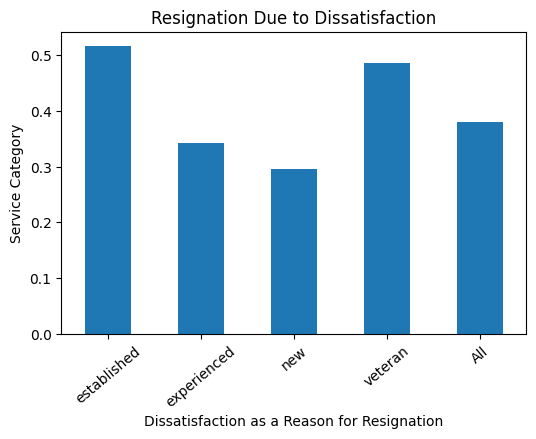

In [40]:
# Bar plot
satisfaction_by_category.plot(kind='bar',
                              title = 'Resignation Due to Dissatisfaction',
                              legend=False,
                              rot=40)
plt.xlabel('Dissatisfaction as a Reason for Resignation')
plt.ylabel('Service Category')
plt.show()